In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# ferificando quantos arquivos tem nas seguintes pastas:
# CANDIDATE
# CONFIRMED
# FALSE POSITIVE

# PARA A PASTA CANDIDATE

count = 0

for path in os.listdir('CANDIDATE'):
    if os.path.isfile(os.path.join('CANDIDATE', path)):
        count += 1
        
print('CANDIDATE:', count)

CANDIDATE: 905


In [3]:
count = 0

for path in os.listdir('CONFIRMED'):
    if os.path.isfile(os.path.join('CONFIRMED', path)):
        count += 1
        
print('CONFIRMED:', count)

CONFIRMED: 395


In [4]:
count = 0

for path in os.listdir('FALSE POSITIVE'):
    if os.path.isfile(os.path.join('FALSE POSITIVE', path)):
        count += 1
        
print('FALSE POSITIVE:', count)

FALSE POSITIVE: 246


In [5]:
df = pd.read_csv('filtered_df.csv')

In [6]:
df['disposition'].value_counts()

disposition
CANDIDATE         913
CONFIRMED         398
FALSE POSITIVE    247
Name: count, dtype: int64

## lendo imgagem .npz de cada path

In [7]:
candidate_path = os.path.join(os.getcwd(), 'CANDIDATE')
confirmed_path = os.path.join(os.getcwd(), 'CONFIRMED')
false_positive_path = os.path.join(os.getcwd(), 'FALSE POSITIVE') 

In [8]:
candidate_path

'/home/arthurbarreto/Documents/Insper/ic/credenciais_drive/CANDIDATE'

img= (3856, 11, 13)


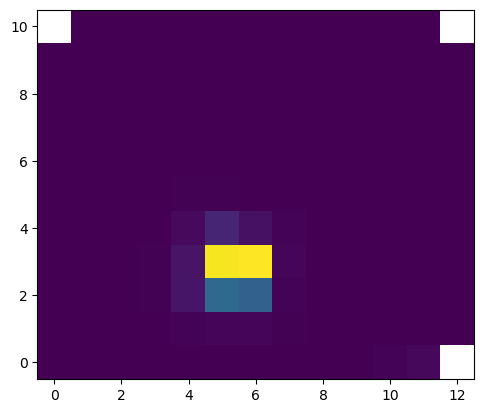

img= (3894, 9, 9)


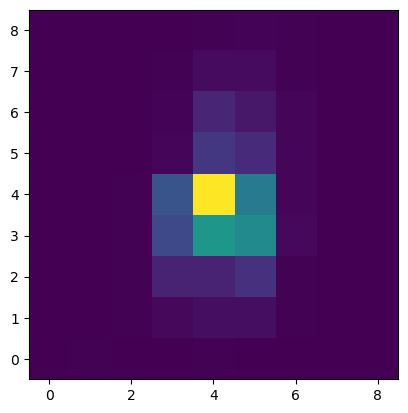

img= (3663, 7, 8)


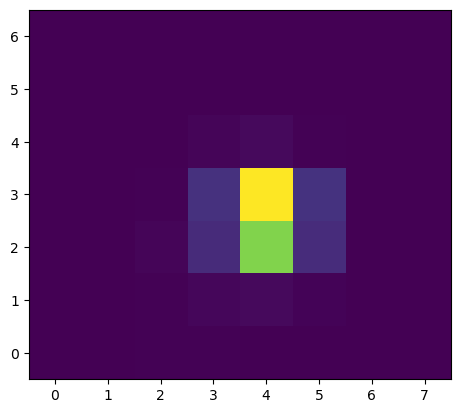

img= (3901, 11, 10)


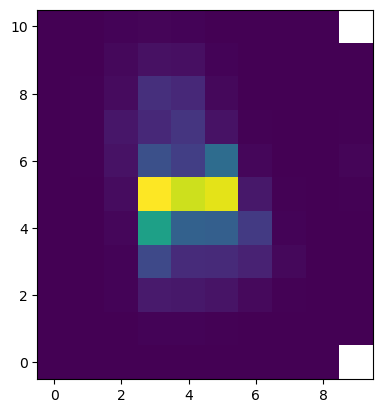

img= (3663, 10, 10)


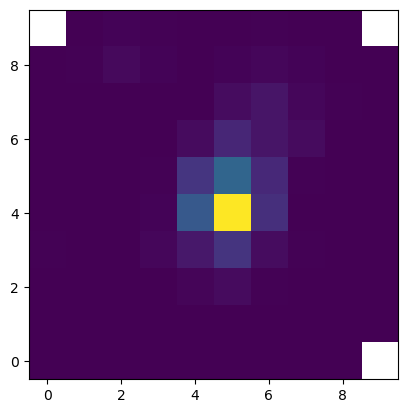

In [9]:
c = 0

for file in os.listdir(candidate_path):
    file = os.path.join(candidate_path, file)
    if os.path.isfile(file):
        img = np.load(file)
        print(f'img= {img["matrix_img"].shape}')
        loaded_img = img["matrix_img"]
        plt.imshow(loaded_img[0], origin="lower")
        plt.show()

    c += 1

    if c == 5:
        break

img= (3663, 9, 10)


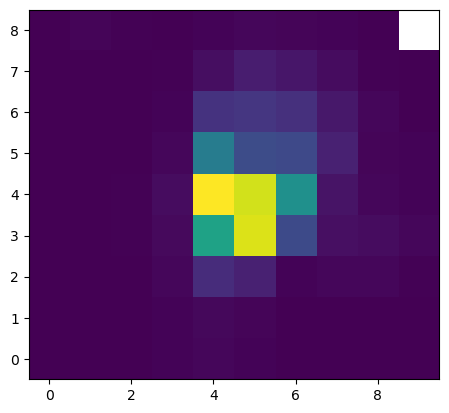

img= (3663, 12, 12)


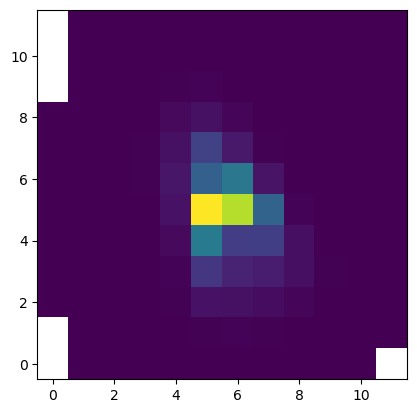

img= (3863, 7, 8)


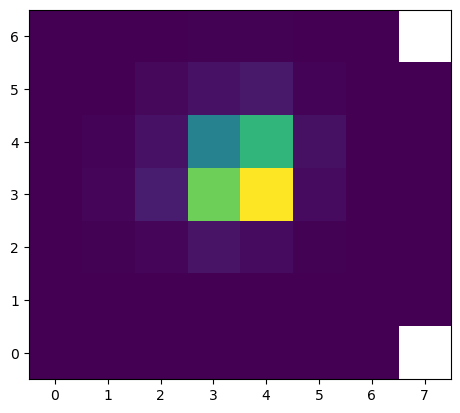

img= (306, 12, 12)


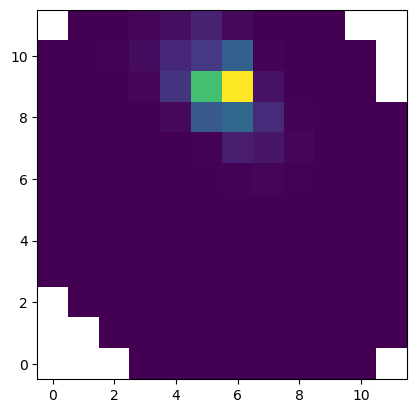

img= (3901, 10, 11)


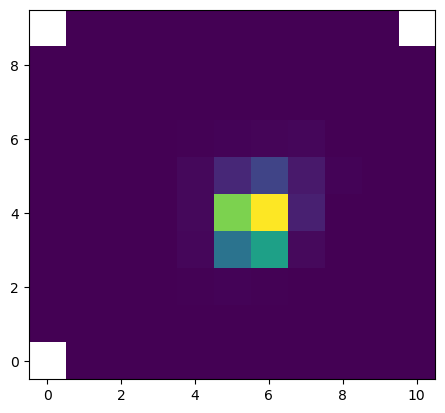

In [10]:
c = 0

for file in os.listdir(confirmed_path):
    file = os.path.join(confirmed_path, file)
    if os.path.isfile(file):
        img = np.load(file)
        print(f'img= {img["matrix_img"].shape}')
        loaded_img = img["matrix_img"]
        plt.imshow(loaded_img[0], origin='lower')
        plt.show()
        
    c += 1
    
    if c == 5:
        break

img= (7, 9)


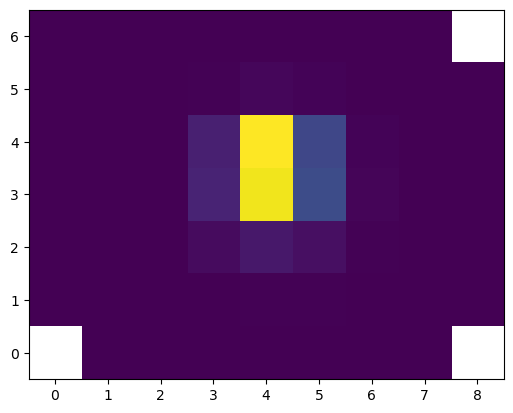

img= (8, 9)


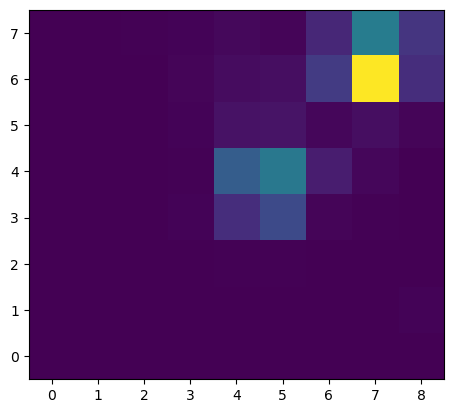

img= (12, 11)


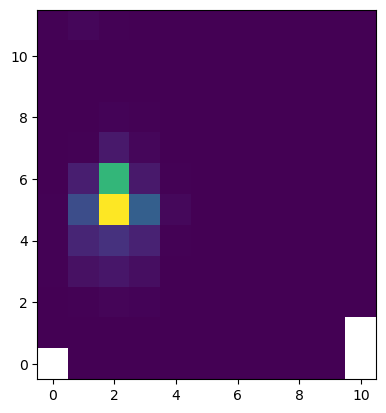

img= (11, 11)


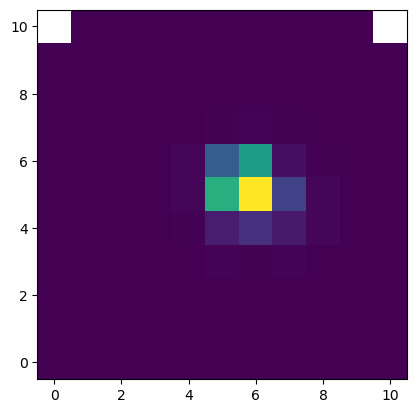

img= (13, 13)


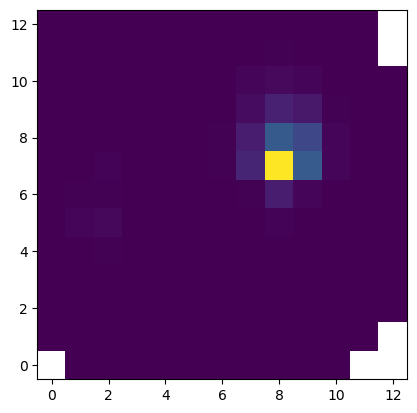

In [12]:
c = 0

for file in os.listdir(false_positive_path):
    file = os.path.join(false_positive_path, file)
    if os.path.isfile(file):
        img = np.load(file)
        print(f'img= {img["matrix_img"].shape}')
        loaded_img = img["matrix_img"]
        plt.imshow(loaded_img, origin="lower")
        plt.show()

    c += 1

    if c == 5:
        break

## get the min and max shape from each type

In [11]:
# geting the min and max values form shapes for each kinf of iomage

min_candidate = 1000
max_candidate = 0

for file in os.listdir(candidate_path):
    file = os.path.join(candidate_path, file)
    if os.path.isfile(file):
        img = np.load(file)
        loaded_img = img["matrix_img"]
        if loaded_img.shape[0] < min_candidate:
            min_candidate = loaded_img.shape[0]
        if loaded_img.shape[0] > max_candidate:
            max_candidate = loaded_img.shape[0]
            
print(f'candidate min= {min_candidate}')
print(f'candidate max= {max_candidate}')

candidate min= 306
candidate max= 4308


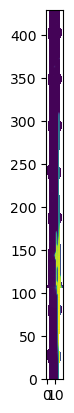

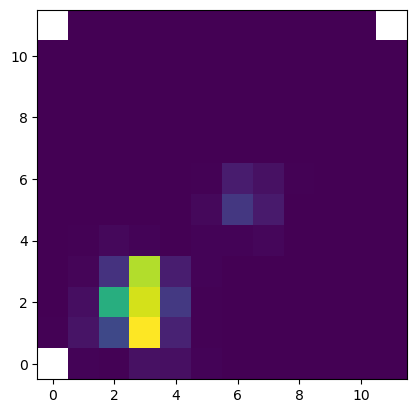

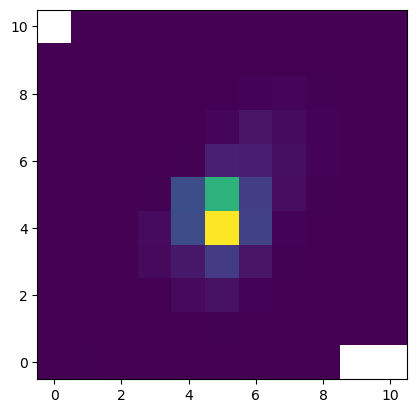

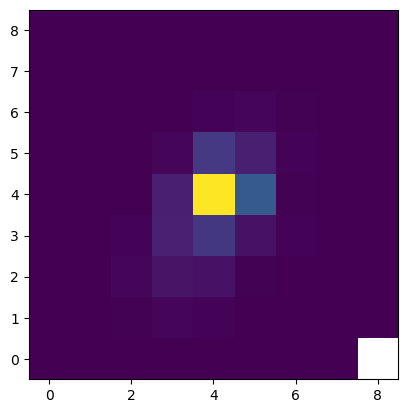

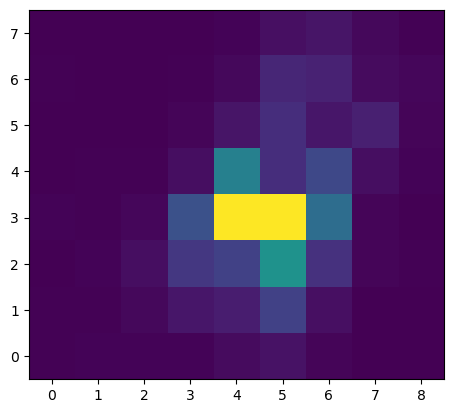

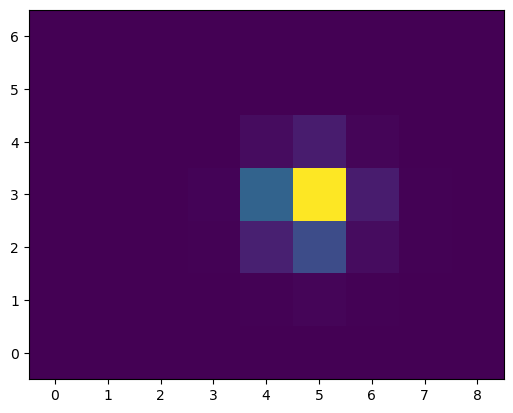

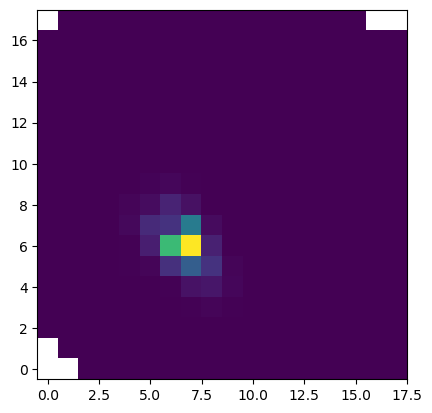

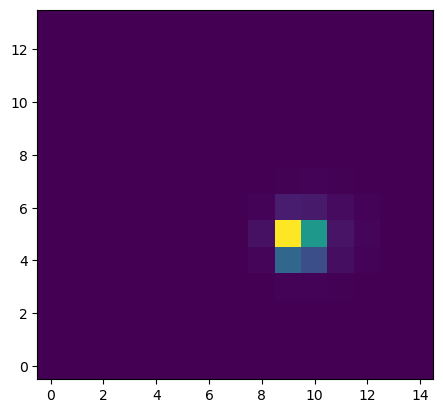

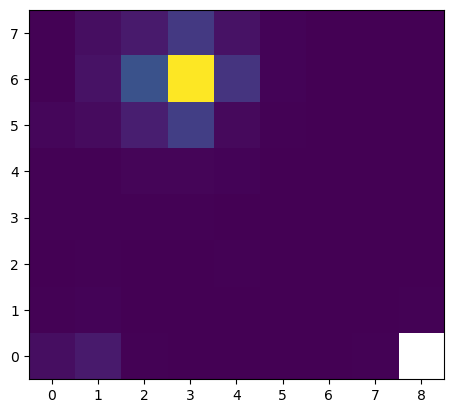

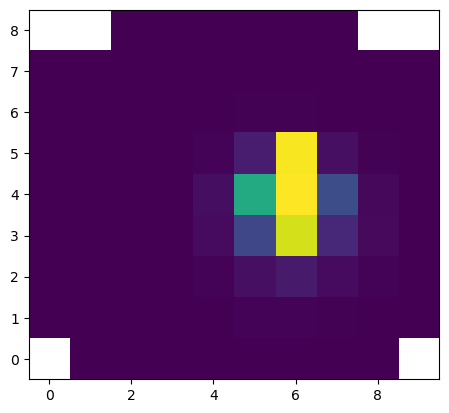

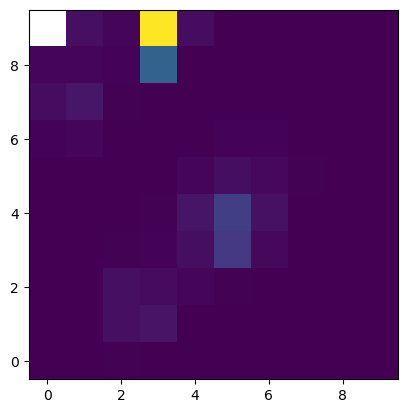

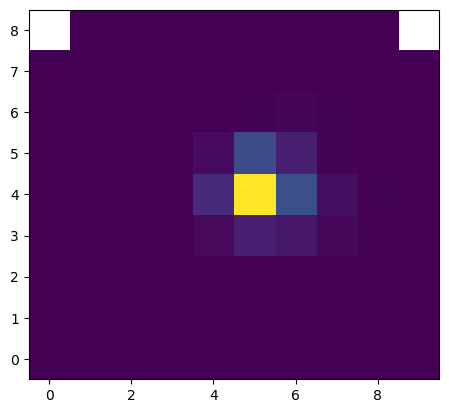

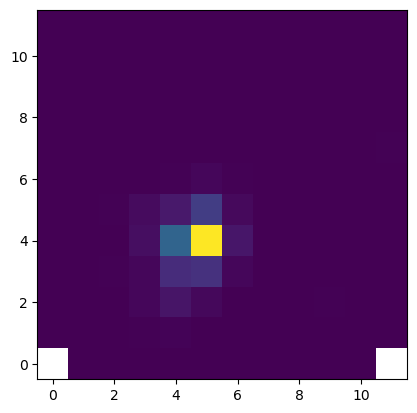

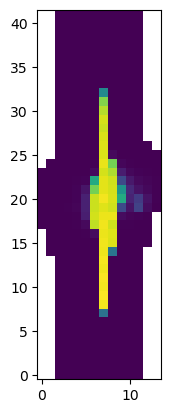

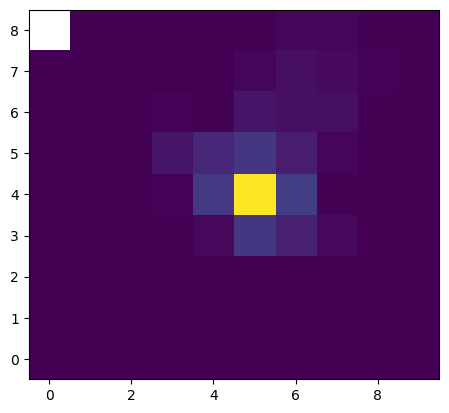

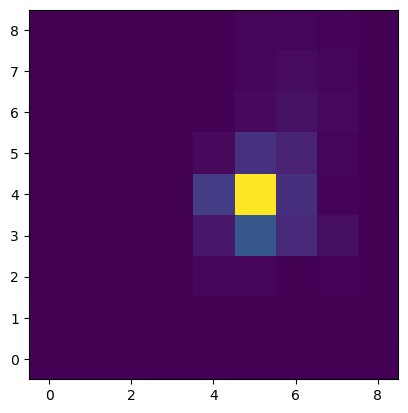

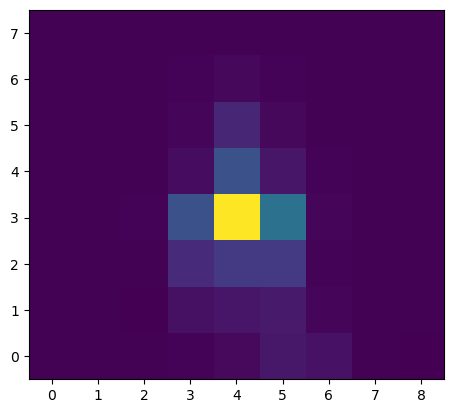

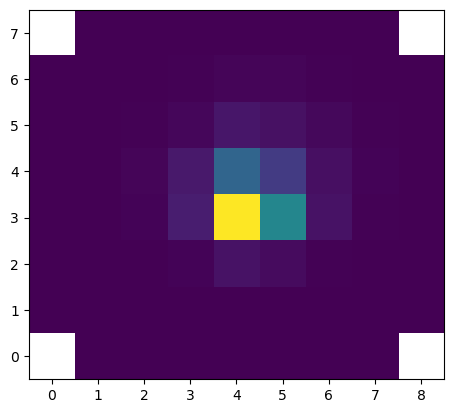

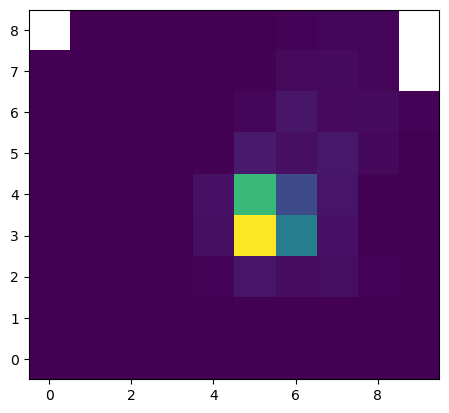

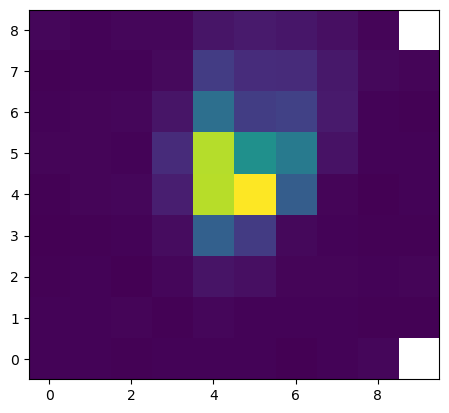

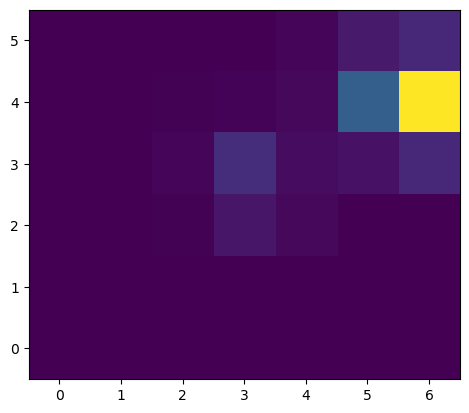

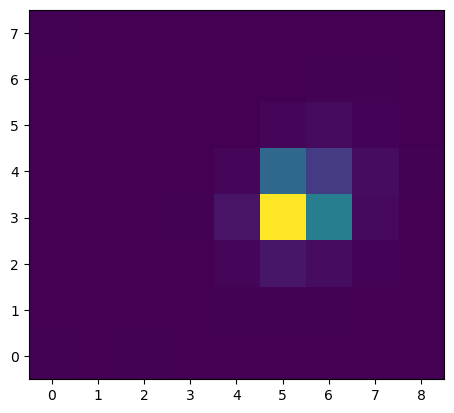

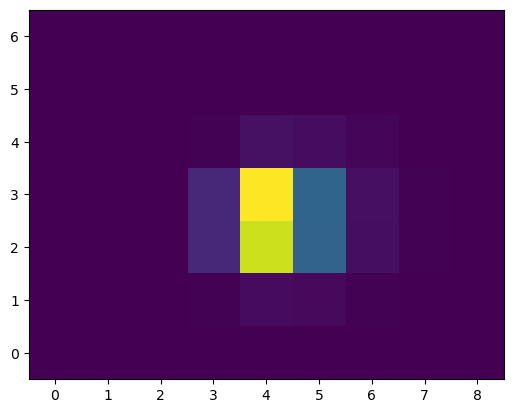

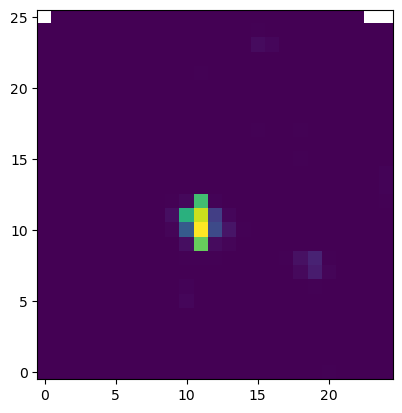

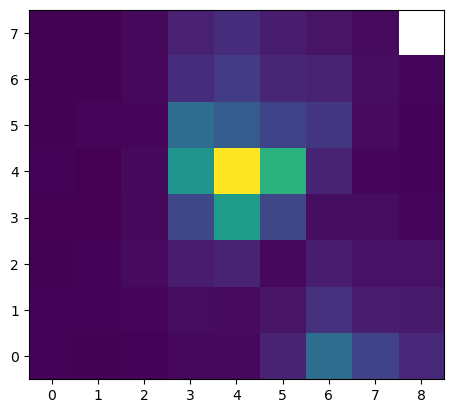

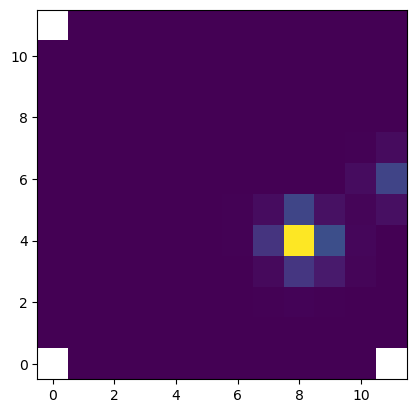

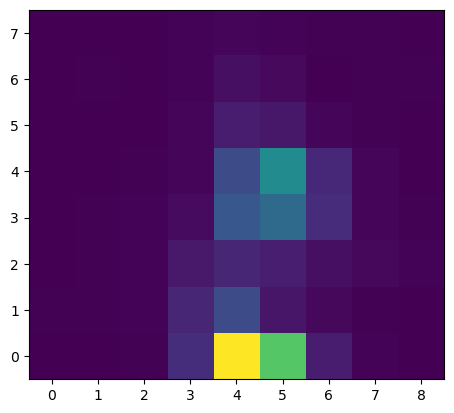

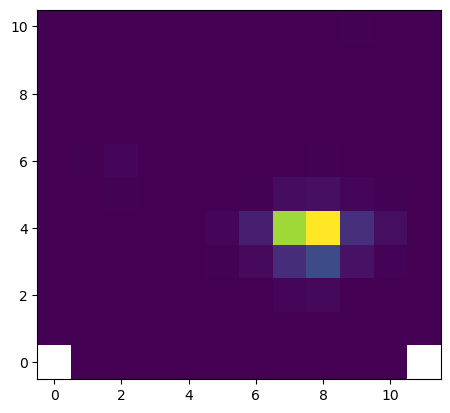

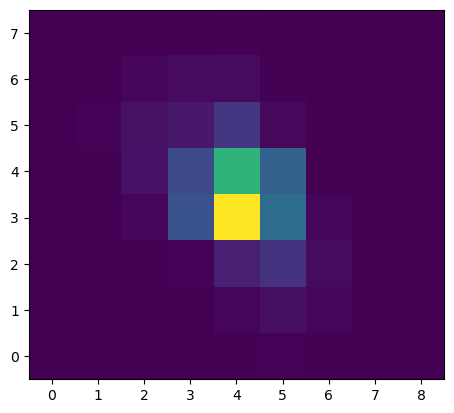

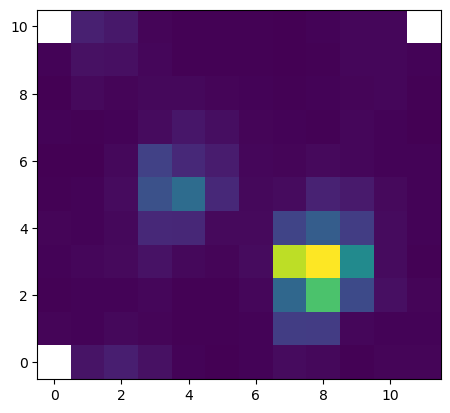

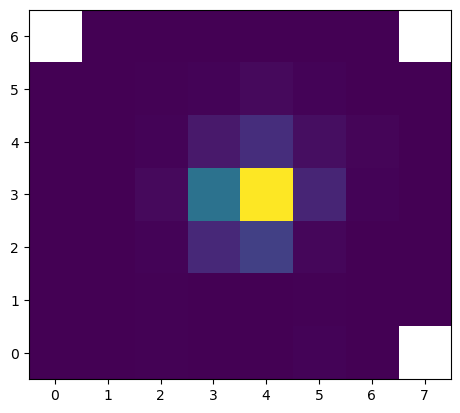

false positive min= 5
false positive max= 430


In [20]:
min_false_positive = 1000
max_false_positive = 0

for file in os.listdir(false_positive_path):
    file = os.path.join(false_positive_path, file)
    if os.path.isfile(file):
        img = np.load(file)
        loaded_img = img["matrix_img"]
        if loaded_img.shape[0] < min_false_positive:
            min_false_positive = loaded_img.shape[0]
        if loaded_img.shape[0] > max_false_positive:
            max_false_positive = loaded_img.shape[0]
            
        if max_false_positive == 430:
            plt.imshow(loaded_img, origin="lower")
            plt.show()
            
            
print(f'false positive min= {min_false_positive}')
print(f'false positive max= {max_false_positive}')

In [17]:
min_shape = 1000
max_shape = 0

# writing each img shape in a csv file

with open('img_shapes_cacndidate.csv', 'w') as f:
    f.write('img_shape\n')
    for file in os.listdir(candidate_path):
        file = os.path.join(candidate_path, file)
        if os.path.isfile(file):
            img = np.load(file)
            shape = img['matrix_img'].shape
            f.write(f'{shape}\n')
            if shape[0] < min_shape:
                min_shape = shape[0]
            if shape[0] > max_shape:
                max_shape = shape[0]
                
with open('img_shapes_false_positve.csv', 'w') as f:
    f.write('img_shape\n')
    for file in os.listdir(false_positive_path):
        file = os.path.join(false_positive_path, file)
        if os.path.isfile(file):
            img = np.load(file)
            shape = img['matrix_img'].shape
            f.write(f'{shape}\n')
            if shape[0] < min_shape:
                min_shape = shape[0]
            if shape[0] > max_shape:
                max_shape = shape[0]
                
with open('img_shapes_confirmed.csv', 'w') as f:
    f.write('img_shape\n')
    for file in os.listdir(confirmed_path):
        file = os.path.join(confirmed_path, file)
        if os.path.isfile(file):
            img = np.load(file)
            shape = img['matrix_img'].shape
            f.write(f'{shape}\n')
            if shape[0] < min_shape:
                min_shape = shape[0]
            if shape[0] > max_shape:
                max_shape = shape[0]